In [1]:
#import sys

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import json
import warnings
warnings.filterwarnings('ignore')

**The following function fit the model for each combination of parameters and  returns accuracy, precision, recall for each model.

In [40]:
# The following function fit the model for each combination of parameters and returns accuracy, precision, recall 
# for each model.

def run(a_clf, data, clf_hyper={}):
    # unpack independent features, dependent feature and number of folds 
    X, Y, number_folds = data 
    # cross validation
    cv = KFold(n_splits=number_folds, random_state=1234)  
    ret = {}  
      
    for ids, (train_index, test_index) in enumerate(cv.split(X, Y)): 
        # unpack parameters
        clf = a_clf(**clf_hyper) 
        
        # fit the model with a fold
        clf.fit(X[train_index], Y[train_index])   
                   
        # predict for test data
        pred = clf.predict(X[test_index])           
        
        # append metrics to a dictionary
        ret[ids]= {'clf': clf,                     
        #       'train_index': train_index,
        #       'test_index': test_index,
               'accuracy': accuracy_score(Y[test_index], pred),  
               'precision': precision_score(Y[test_index], pred), 
         #      'recall': recall_score(Y[test_index], pred) 
               }    
    return ret


**The following function takes hyper parameter dictionary and creates all possible combinations of hyper parameter for each classification model 

In [41]:
# The following function takes hyper parameter dictionary and creates all possible combinations of hyper parameter 
# for each classification model 
def Clf_Hyperparams(clfsList):
    ret_hyper = dict();
    for clf in clfsList:
        # convert the classifier to string
        clfString = str(clf)  
        
        # Iterate all hyper parameters
        for k1, v1 in clf_Dict.items():   
            if k1 in clfString: 
                ret_hyper[clf] = [dict(zip(v1, s)) for s in product(*v1.values())]

    return ret_hyper   

In [42]:
#load Breast Cancer Data Set from sklearn
cancer = datasets.load_breast_cancer()

#independent features 
X = cancer.data

# Dependent feature 
Y = cancer.target

# Enter: Number of folds (k-fold) cross validation
number_folds = 10

#Pack independent features, dependent feature and number of folds into a variable 'data'
data = (X,Y,number_folds)

In [43]:
# List of Classifiers 
clf_List = [RandomForestClassifier, LogisticRegression, KNeighborsClassifier]
#clf_List = [RandomForestClassifier]

# Dictionary of parameters for each classifier

clf_Dict = {'RandomForestClassifier': {
                    "n_estimators": [100, 150, 200],
                    "max_depth": [5, 10, 15, 20],
                    "min_samples_leaf": [3, 4, 5]},
            'LogisticRegression': {
                    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
                    "C" :[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    "max_iter": [500,1500,2000]},
            'KNeighborsClassifier': {
                    "n_neighbors": [5, 13,15,17],
                    "metric": ['minkowski','euclidean', 'manhattan'],
                   "weights": ['uniform','distance']}}
         

In [44]:
# create dictionary with all possible combinations of parameters
hyper_param_dict = dict()
for clf in clf_List:
    clfString = str(clf)
    for k1, v1 in clf_Dict.items(): 
        if k1 in clfString:
            hyper_param_dict[clf] = [dict(zip(v1, s)) for s in product(*v1.values())]

In [45]:
print(hyper_param_dict)

{<class 'sklearn.ensemble._forest.RandomForestClassifier'>: [{'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 3}, {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 4}, {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 5}, {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 3}, {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 4}, {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 5}, {'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf': 3}, {'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf': 4}, {'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf': 5}, {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 3}, {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 4}, {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 5}, {'n_estimators': 150, 'max_depth': 5, 'min_samples_leaf': 3}, {'n_estimators': 150, 'max_depth': 5, 'min_samples_leaf': 4}, {'n_estimators': 150, 'max_depth': 5, 'min_samples_leaf': 5}, 

In [46]:
# Iterate each model and possible hyper-parameter combinations, fit the model and create a metric dictionary  for n-folds
clfs_metrics_Dict = {}
clf_results={}
for clf in clf_List:
    for params in hyper_param_dict[clf]:
        clf_hyper = params
        clf_results = run(clf, data, clf_hyper)
        
        acc_list = []


In [56]:
for key in clf_results:
    
    clf_param_metric = []
    print('key:',key)
    print(clf_results)
    clf_key = clf_results[key]['clf'] 
    acc_value = clf_results[key]['accuracy']
    prec_value = clf_results[key]['precision']
    # recal_value = clf_results[key]['recall']
    # clf_param_metric = [acc_value, prec_value, recal_value]
          
    clf_key_str = str(clf_key)
    
    clf_key_str = ' '.join(x.strip() for x in clf_key_str.split())
    #clf_key_str = clf_key_str.replace('                     ',' ')  
    #clf_key_str = clf_key_str.replace('          ',' ')
                
    # Validate whether classifier is already exists in the dictionary 
    if clf_key_str in clfs_metrics_Dict:
        # if exists append the accuracy, precision and recall 
        clfs_metrics_Dict[clf_key_str].append(acc_value)
    else:
        # if doesn't exists create a new key for the classifier
        clfs_metrics_Dict[clf_key_str] = [acc_value] 

key: 0
{0: {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance'), 'accuracy': 0.7543859649122807, 'precision': 0.44}, 1: {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance'), 'accuracy': 0.9298245614035088, 'precision': 0.918918918918919}, 2: {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance'), 'accuracy': 0.9298245614035088, 'precision': 0.9444444444444444}, 3: {'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance'), 'accu

In [57]:
print(clfs_metrics_Dict)

{"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',\n                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,\n                     weights='distance')": [0.7543859649122807, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9824561403508771, 0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9821428571428571], "KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan', metric_params=None, n_jobs=None, n_neighbors=17, p=2, weights='distance')": [0.7543859649122807, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9824561403508771, 0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9821428571428571, 0.7543859649122807, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9824561403508771, 0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9821428571428571, 0.7543859649122807, 0.9298245614035088, 0.9298245614

In [53]:
# Sort based on mean accuracy values  
clfs_metrics_list_sorted = sorted(clfs_metrics_Dict.items(), key=lambda item: statistics.median(item[1]), reverse=True)

In [54]:
# Create separate list for accuracy, classifier and mean accuracy
Acc_list, Classifier, Acc_median = ([] for i in range(3))

for i in clfs_metrics_list_sorted:
    Classifier.append(i[0])
    Acc_list.append(i[1])
    Acc_median.append(statistics.mean(i[1]))

ValueError: Neither the `x` nor `y` variable appears to be numeric.

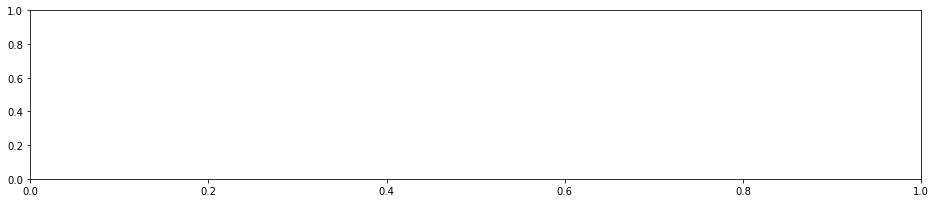

In [55]:
fig_dims = (15, len(clfs_metrics_list_sorted)*1.8)
fig, ax = plt.subplots(figsize=fig_dims)
fig.subplots_adjust(left=0.125, right=0.95, top=0.9, bottom=0.25)
ax = sns.boxplot(x=Acc_list,y=Classifier)
ax.set(xlabel='Percent Accuracy per k-fold', ylabel='Classifier/Hyper Parameters')
ax.set_title("Accuracy Score vs Classification/Hyper-Parameters\nBest median Accuracy Score: {} ".format(round(Acc_median[0],4)))

In [13]:
# Using GridSearchCV
cv = KFold(n_splits=10, random_state=1234)

# define parameters       
max_depth_RF = [5, 10, 15, 20]
min_samples_leaf_RF = [3, 4, 5]
n_estimators_RF =  [100, 200, 300]

# define grid search
param_grid_RF = dict(n_estimators=n_estimators_RF, max_depth=max_depth_RF, min_samples_leaf=min_samples_leaf_RF) 

RF = RandomForestClassifier()

grid_search_RF = GridSearchCV(estimator=RF, param_grid=param_grid_RF, n_jobs=-1, cv=cv, 
                               scoring='accuracy',error_score=0, verbose=1)

grid_result_RF = grid_search_RF.fit(X, Y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.9s finished


In [14]:
print("Best: %f using %s" % (grid_result_RF.best_score_, grid_result_RF.best_params_))
means = grid_result_RF.cv_results_['mean_test_score']
stds = grid_result_RF.cv_results_['std_test_score']
params = grid_result_RF.cv_results_['params']

Best: 0.957863 using {'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 300}


In [15]:
import csv
writer = csv.writer(open("file1.csv", 'w'))
for row in clfs_metrics_list_sorted:
    writer.writerow(row)

In [16]:
with open('test.txt', 'w') as f:
    for row in clfs_metrics_list_sorted:
        f.write("%s\n" % str(row))